In [843]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [844]:
data = pd.read_csv(os.path.join("data", "train.csv"))

In [845]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [846]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [847]:
data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [848]:
data["FamilySize"] = data["Parch"] + data["SibSp"]

In [849]:
data.drop(columns=["SibSp", "Parch"], inplace=True)

In [850]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [851]:
X_data = data.drop(columns=["Survived"])
y_data = data["Survived"]

In [852]:
X_data.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [853]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    object 
 2   Age         714 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked    889 non-null    object 
 5   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [854]:
X_data.isnull().sum()

Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
FamilySize      0
dtype: int64

In [855]:
X_data["Age"] = X_data["Age"].fillna(X_data["Age"].median())
X_data["Embarked"] = X_data["Embarked"].ffill()

In [856]:
X_data.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [857]:
X_data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [858]:
X_data["Embarked"] = X_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
X_data["Sex"] = X_data["Sex"].map({"male": 0, "female": 1})

In [859]:
X_data.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0


In [860]:
dataset = tf.data.Dataset.from_tensor_slices((X_data.values, y_data.values))

In [861]:
batch_size = 32
dataset = dataset.shuffle(buffer_size=len(X_data)).batch(batch_size)

In [862]:
len(dataset)

28

In [863]:
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset)) + 1
test_size = int(0.2 * len(dataset)) + 1
train_size, val_size, test_size

(19, 3, 6)

In [864]:
train_data = dataset.take(train_size)
val_data = dataset.skip(train_size).take(val_size)
test_data = dataset.skip(train_size + val_size).take(test_size)

len(train_data), len(test_data)

(19, 6)

Creating a model

In [865]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [866]:
model = Sequential()

In [867]:
model.add(Dense(64, activation="relu", input_shape=(6,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))

model.add(Dense(16, activation="relu"))

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/home/varshaan/titanic-dataset/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [868]:
from tensorflow.keras.optimizers import Adam

In [869]:
model.compile(optimizer=Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [870]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,617 (14.13 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 0 (0.00 B)

In [871]:
history = model.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5788 - loss: 0.7874 - val_accuracy: 0.6562 - val_loss: 0.6532
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6737 - loss: 0.6579 - val_accuracy: 0.6667 - val_loss: 0.6198
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.6091 - val_accuracy: 0.7604 - val_loss: 0.5109
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.5756 - val_accuracy: 0.7604 - val_loss: 0.5407
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.5717 - val_accuracy: 0.6458 - val_loss: 0.6463
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6455 - loss: 0.6082 - val_accuracy: 0.6354 - val_loss: 0.5939
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 0.5364 - val_accuracy: 0.7188 - val_loss: 0.4929
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.5745 - val_accuracy: 0.7188 - val_loss:

In [872]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

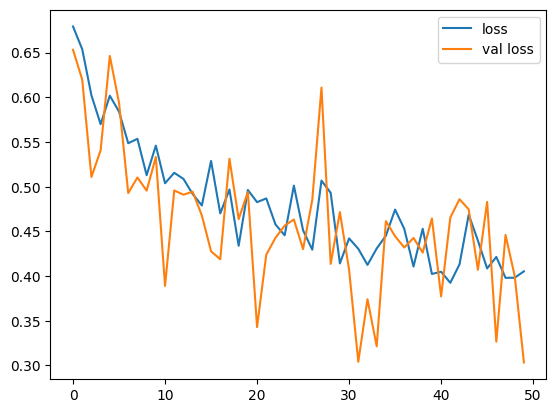

In [873]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()

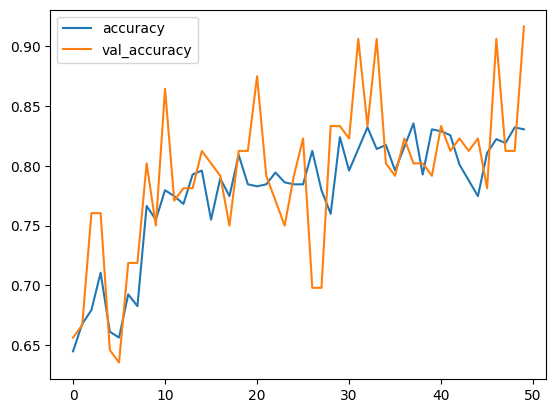

In [874]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()